In [4]:
from random import uniform as rand
import numpy as np

def randConstrained(n, M):
     splits = [0] + [rand(0, 1) for _ in range(0,n-1)] + [1]
     splits.sort()
     diffs = [x - splits[i - 1] for i, x in enumerate(splits)][1:]
     result = map(lambda x:x*M, diffs)
     return result

res = randConstrained(8,0.5)

print(sum(res))

0.5


In [5]:
print(np.array(res))

In [8]:
import random

def rand_constrained(n, total):
    # l is a sorted list of n-1 random numbers between 0 and total
    l = sorted([0] + [total * random.random() for i in range(n - 1)] + [total])
    # Return the intervals between each successive element
    return [l[i + 1] - l[i] for i in range(n)]

print(rand_constrained(840, 38.5608))

[0.03796717838825356, 0.02985333678907455, 0.004383141090903181, 0.017387718217170542, 0.055249768901356994, 0.10878531864010235, 0.009733173062644707, 0.026887678493408285, 0.02480199121770238, 0.07210812098182828, 0.054673470316786044, 0.08393796452297642, 0.02010557291549453, 0.03540656362607897, 0.035129269052064926, 0.014254934247671103, 0.024337880974198423, 0.0012991474577862538, 0.027243491555813626, 0.08327593566184932, 0.088813565361335, 0.02674000080951966, 0.10701127381988662, 0.005861365804600394, 0.05009127559725224, 0.05462191564185237, 0.03825355213383452, 0.0030255257303122285, 0.0019932878827997325, 0.00969539231709926, 0.03698031463007978, 0.06215180605640591, 0.05453012172763638, 0.005382489601168272, 0.036780037312731606, 0.02845714585750536, 0.0017439165718968752, 0.005796349724007666, 0.1000490445316653, 0.028184334803095012, 0.05043513721205373, 0.025921959911067383, 0.1985805407227823, 0.050571938135885786, 0.1876356878958909, 0.07135345609465604, 0.06440765438

In [10]:
print(sum(rand_constrained(840, 38.5608)))

38.5608


In [21]:
import numpy as np


mu, sigma = 0.04591, 0.00194 # mean and standard deviation
s =np.random.normal(mu, sigma, 840)

In [22]:
s

array([0.04680057, 0.04584628, 0.04558087, 0.0429381 , 0.04699018,
       0.04387515, 0.04720564, 0.04609467, 0.05069534, 0.04529423,
       0.04422815, 0.04648146, 0.04463335, 0.04521265, 0.04895889,
       0.04438606, 0.04745713, 0.04632214, 0.04789501, 0.04291064,
       0.04410997, 0.04797014, 0.04543061, 0.04326459, 0.04342326,
       0.0464923 , 0.04605718, 0.04666992, 0.04714976, 0.04899585,
       0.04599216, 0.04584754, 0.0450234 , 0.04868463, 0.0477236 ,
       0.04277437, 0.0422299 , 0.04642569, 0.04346277, 0.04438309,
       0.0476976 , 0.04892709, 0.04591346, 0.04410735, 0.04784907,
       0.04483403, 0.04762958, 0.04811004, 0.04367629, 0.04731608,
       0.0477436 , 0.04611558, 0.04410428, 0.04573871, 0.04674888,
       0.04604871, 0.04494357, 0.04374922, 0.0422896 , 0.04481961,
       0.04538704, 0.04848199, 0.04573665, 0.04696751, 0.04662588,
       0.04397963, 0.04472855, 0.04501237, 0.04567471, 0.04814217,
       0.04509674, 0.04454862, 0.04433099, 0.04787572, 0.04409

In [43]:
from scipy.special import comb
from scipy.stats import norm

n = 840
x = 37



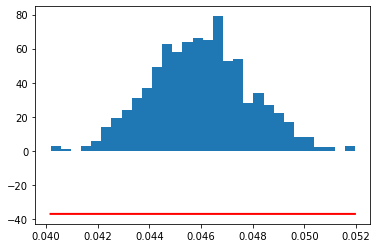

In [44]:

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 30)
plt.plot(bins, comb(n, x, exact=True) * bins**x * (1 - bins)**n-x,
       linewidth=2, color='r')

In [45]:
plt.show()

np.std(s)


0.0019053496116717542

In [74]:
#1/(sigma * np.sqrt(2 * np.pi)) *
               #np.exp( - (bins - mu)**2 / (2 * sigma**2) )

comb(840, 37, exact=True) * 0.04591**37 * (1 - 0.04591)**(840 - 37)

0.06471092953753516

In [99]:
from scipy.stats import norm

def plot_ll():
    plt.figure(figsize=(15,12))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(3000, 4600)
    plt.xlim(0.030, 0.06)
    n = 840
    success = 37
    mu_set = np.linspace(0.035, 0.06, 840)
    sd_set = [0.00194, 0.00114, 0.00708, 0.00724]
    max_val = max_val_location = 0
    x = []
    
    
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            mu, sigma = j, i # mean and standard deviation
            x =np.random.normal(mu, sigma, 840)
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
                #temp_mm += comb(n, success, exact=True) * k**success * (1 - k)**(n - success) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val == 0):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.5f" % i)
        
        print("The max LL for sd %.5f is %.5f" % (i, max(ll_array)) ) 
        print("mean: %.5f and std: %.5f" % (np.mean(x), np.std(x)))
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')
    
    

The max LL for sd 0.00194 is 4131.67185
mean: 0.05996 and std: 0.00200
The max LL for sd 0.00114 is 4559.44313
mean: 0.06003 and std: 0.00111
The max LL for sd 0.00708 is 3026.33958
mean: 0.05967 and std: 0.00704
The max LL for sd 0.00724 is 3002.95919
mean: 0.06026 and std: 0.00692


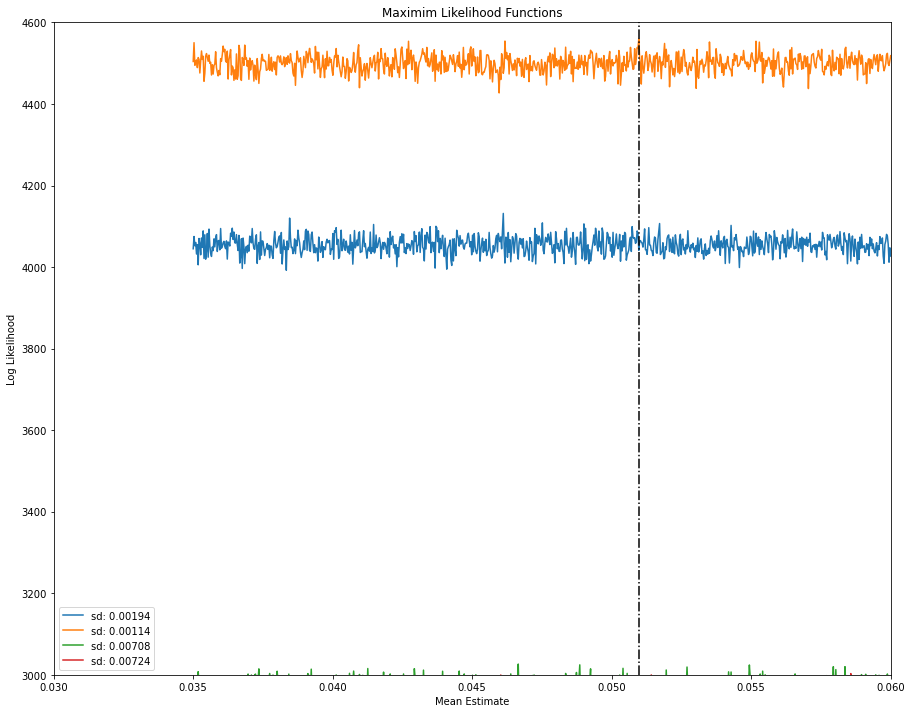

In [100]:
plot_ll()

In [78]:
np.linspace(0.04, 0.052, 840)

array([0.04      , 0.0400143 , 0.04002861, 0.04004291, 0.04005721,
       0.04007151, 0.04008582, 0.04010012, 0.04011442, 0.04012872,
       0.04014303, 0.04015733, 0.04017163, 0.04018594, 0.04020024,
       0.04021454, 0.04022884, 0.04024315, 0.04025745, 0.04027175,
       0.04028605, 0.04030036, 0.04031466, 0.04032896, 0.04034327,
       0.04035757, 0.04037187, 0.04038617, 0.04040048, 0.04041478,
       0.04042908, 0.04044338, 0.04045769, 0.04047199, 0.04048629,
       0.0405006 , 0.0405149 , 0.0405292 , 0.0405435 , 0.04055781,
       0.04057211, 0.04058641, 0.04060072, 0.04061502, 0.04062932,
       0.04064362, 0.04065793, 0.04067223, 0.04068653, 0.04070083,
       0.04071514, 0.04072944, 0.04074374, 0.04075805, 0.04077235,
       0.04078665, 0.04080095, 0.04081526, 0.04082956, 0.04084386,
       0.04085816, 0.04087247, 0.04088677, 0.04090107, 0.04091538,
       0.04092968, 0.04094398, 0.04095828, 0.04097259, 0.04098689,
       0.04100119, 0.04101549, 0.0410298 , 0.0410441 , 0.04105